# Pengembangan Recommender System dengan Fitur Film

Mari kita lihat bagaimana kita bisa mengembangkan sebuah **recommender system** jika kita memiliki fitur-fitur dari setiap item atau fitur-fitur dari setiap film. Misalnya, kita menggunakan data yang sama seperti sebelumnya, di mana empat pengguna telah memberikan rating untuk beberapa, tetapi tidak semua dari lima film. Sekarang, bagaimana jika kita juga memiliki **fitur-fitur film**?

Di sini, saya telah menambahkan dua fitur, yaitu **X1** dan **X2**, yang menunjukkan seberapa romantis dan seberapa banyak aksi dalam setiap film tersebut. Misalnya, **Love at Last** adalah film yang sangat romantis, jadi fitur romantisnya (X1) bernilai **0.9**, tetapi film ini sama sekali bukan film aksi, sehingga fitur aksinya (X2) bernilai **0**. Sedangkan, **Nonstop Car Chases** memiliki sedikit elemen romantis (X1 = 0.1), tetapi penuh aksi (X2 = 1.0).

Kita akan menggunakan beberapa notasi di sini:

- **nu**: jumlah pengguna (dalam contoh ini, 4 pengguna).
- **m**: jumlah film (dalam contoh ini, 5 film).
- **n**: jumlah fitur yang kita miliki (dalam contoh ini, n = 2 untuk fitur X1 dan X2).

## Contoh Prediksi Rating
Mari kita mulai dengan melihat bagaimana kita bisa memprediksi rating film untuk **Alice** (Pengguna 1). Misalnya, kita memprediksi rating untuk film ke-3 dengan model:

$$
\hat{y}(i) = w.X(i) + b
$$

Jika kita memilih **w(1) = [5, 0]** dan **b(1) = 0**, maka prediksi untuk film ke-3, di mana fiturnya adalah **X(3) = [0.99, 0]**, dapat dihitung sebagai:

$$
\hat{y}(3) = 0.99 \times 5 + 0 \times 0 = 4.95
$$

Rating ini terlihat masuk akal karena Alice memberikan rating tinggi pada film yang romantis, seperti **Love at Last** dan **Romance Forever**, tetapi memberikan rating rendah pada film aksi, seperti **Nonstop Car Chases** dan **Swords vs Karate**. Maka, memprediksi bahwa Alice mungkin akan memberikan rating **4.95** pada **Cute Puppies of Love** tampaknya wajar.

## Model untuk Banyak Pengguna
Kita tidak hanya memiliki satu pengguna, tetapi empat pengguna (nu = 4). Untuk setiap pengguna **j**, kita akan memprediksi rating film **i** menggunakan parameter yang berbeda, yaitu **w(j)** dan **b(j)**, sehingga model prediksi menjadi:

$$
\hat{y}(i,j) = w(j).X(i) + b(j)
$$

Model ini mirip dengan **linear regression**, tetapi kita menerapkan model linear regression yang berbeda untuk setiap pengguna.

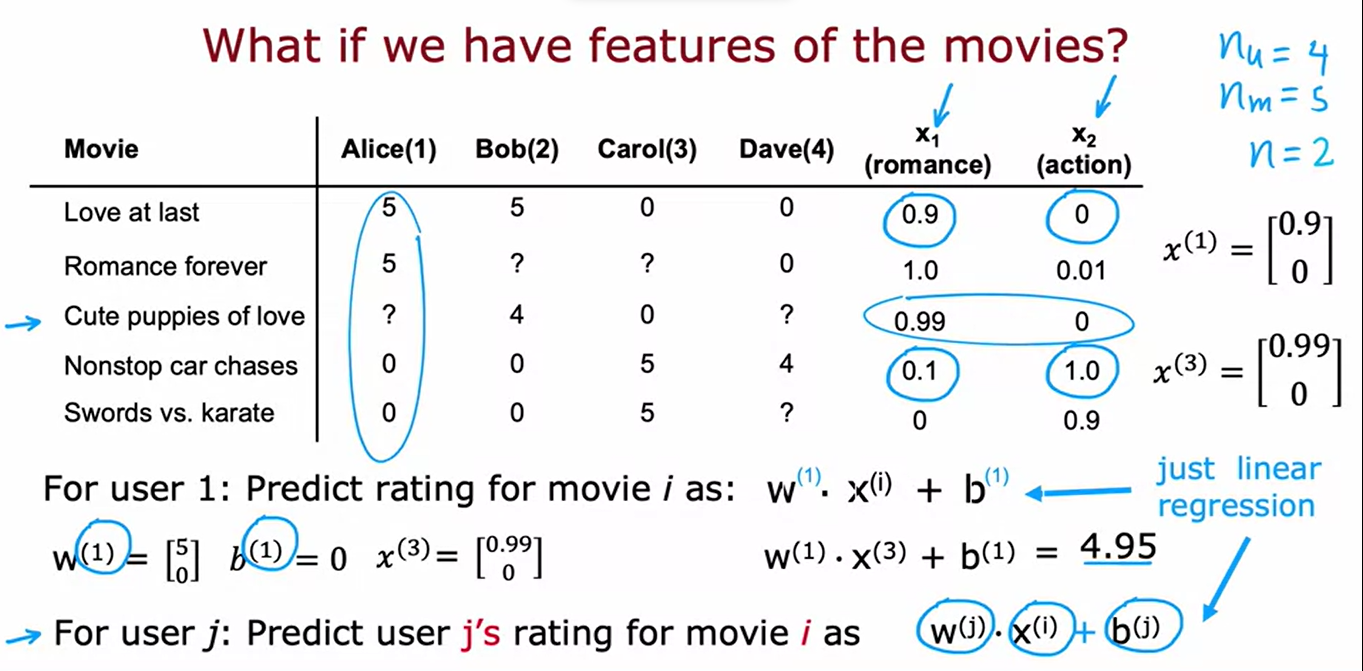

## Fungsi Cost
Untuk melatih model ini, kita perlu meminimalkan **cost function**. Notasi kita adalah:

- **r(i,j) = 1** jika pengguna **j** telah memberikan rating pada film **i**; jika tidak, **r(i,j) = 0**.
- **y(i,j)** adalah rating aktual yang diberikan oleh pengguna **j** untuk film **i**.
- **m(j)** adalah jumlah film yang telah dirating oleh pengguna **j**.

Cost function untuk satu pengguna **j** dapat dituliskan sebagai:

$$
J(w(j), b(j)) = \frac{1}{2m(j)} \sum_{i \, \text{where} \, r(i,j) = 1} (w(j).X(i) + b(j) - y(i,j))^2
$$

Tujuan kita adalah meminimalkan error prediksi antara rating yang diprediksi dan rating yang sebenarnya untuk setiap pengguna **j**. Kita juga menambahkan **regularization term** untuk menghindari overfitting:

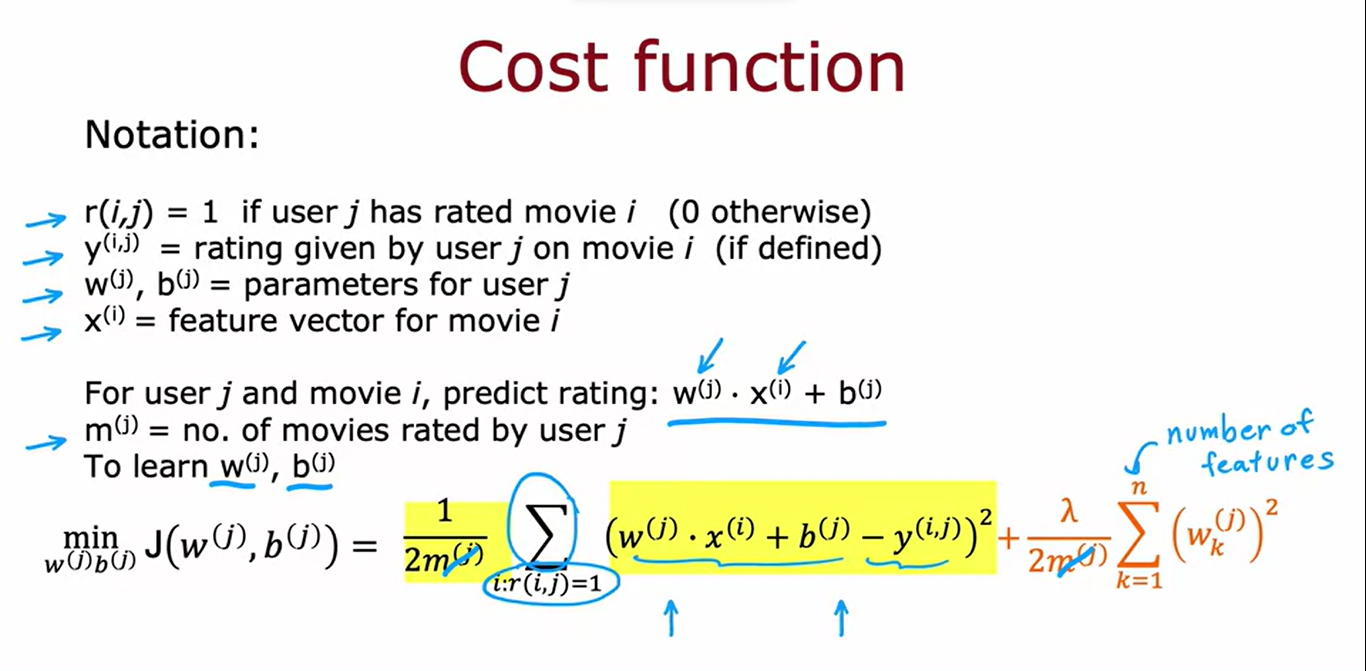

$$
J(w(j), b(j)) = \frac{1}{2m(j)} \sum_{i \, \text{where} \, r(i,j) = 1} (w(j).X(i) + b(j) - y(i,j))^2 + \frac{\lambda}{2m(j)} \sum_{k=1}^{n} w(j,k)^2
$$

Dengan meminimalkan fungsi cost ini, kita akan mendapatkan parameter **w(j)** dan **b(j)** yang baik untuk memprediksi rating pengguna **j** terhadap film-film lain.

## Generalisasi untuk Semua Pengguna
Untuk semua pengguna **j = 1, 2, ..., nu**, kita bisa menjumlahkan fungsi cost untuk semua pengguna:

$$
J_{\text{total}} = \sum_{j=1}^{nu} J(w(j), b(j))
$$

Kita bisa menggunakan metode optimisasi seperti **gradient descent** untuk meminimalkan fungsi cost ini dan mendapatkan parameter yang baik untuk semua pengguna.

![image-3.png](attachment:image-3.png)

## Kesimpulan
Model ini sangat mirip dengan **linear regression**, tetapi dengan menerapkan model yang berbeda untuk setiap pengguna. Ini memungkinkan kita untuk memprediksi rating film berdasarkan fitur-fitur film (X1 dan X2) yang menggambarkan seberapa romantis dan seberapa banyak aksi dalam film tersebut.

Namun, bagaimana jika kita tidak memiliki fitur-fitur ini? Dalam video berikutnya, kita akan melihat modifikasi algoritma ini yang memungkinkan kita membuat prediksi meskipun kita tidak memiliki fitur yang cukup detail tentang film.
